Generating random values for the volume function over time didnt work yet, because the function depends basically not on a constant parameter, but on the total feed into the reactor, which doesnt have a pattern or constant value. 

--> next approach: try with CO2, because here i have Yco2/x as a constant, that i could change randomly. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from E_model import model, show_plot

In [8]:
df_exp = pd.read_csv('data/data_combined.csv')

In [12]:
num_samples = 100
sigma_big = 0.2
sigma_small = 0.01
p = [0.4597, 1.1255, 0.6814, 0.0094, 0.1913]

Yxs_dist = np.random.normal(p[0], sigma_big, num_samples)
qs_max_dist = np.random.normal(p[1], sigma_big, num_samples)
Ks_dist = np.random.normal(p[2], sigma_big, num_samples)
m_s_dist = np.random.normal(p[3], sigma_small, num_samples)
lag_dist = np.random.normal(p[4], sigma_small, num_samples)
F_in_dist = np.array([np.random.normal(val, sigma_small) for val in F_in])


df_p = pd.DataFrame({
    'Yxs': Yxs_dist,
    'qs_max': qs_max_dist,
    'Ks': Ks_dist,
    'm_s': m_s_dist,
    'lag': lag_dist,
    'Fin': F_in_dist })
df_p.describe()



ValueError: All arrays must be of the same length

In [3]:
df_p.head()

,Yxs,qs_max,Ks,m_s,lag,Fin
0,0.347589,1.017761,0.744845,0.002933,0.181627,0.016126
1,0.639118,1.183021,0.932216,0.012395,0.178418,0.018895
2,0.566639,1.270028,0.663666,-0.000416,0.188652,-0.002528
3,0.409379,1.153833,1.281152,-0.012676,0.181891,0.025819
4,0.188348,0.994649,0.410007,0.009380,0.189311,-0.000487


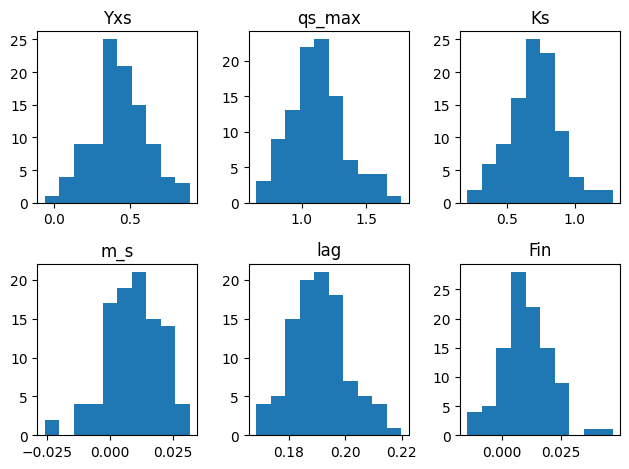

In [4]:
# check if there are enough samples to have a normal distribution
fig, ax = plt.subplots(2, 3)
ax[0,0].hist(df_p['Yxs'])
ax[0,0].set_title('Yxs')
ax[0,1].hist(df_p['qs_max'])
ax[0,1].set_title('qs_max')
ax[0,2].hist(df_p['Ks'])
ax[0,2].set_title('Ks')
ax[1,0].hist(df_p['m_s'])
ax[1,0].set_title('m_s')
ax[1,1].hist(df_p['lag'])
ax[1,1].set_title('lag')

ax[1,2].hist(df_p['Fin'])
ax[1,2].set_title('Fin')
plt.tight_layout()

In [5]:
# define sample frequency
# --> higher frequency reduces the amount of data that has to be stored (less data points)
delta_t =  10#[min]

df_batches = pd.DataFrame(columns=['time', 'biomass', 'glucose', 'batch_id', 'volume'])
for i in range(df_p.shape[0]):
    batch_id = str(i).zfill(3)
    list_p = list(df_p.iloc[i])
    df = model(list_p, delta_t)
    df['batch_id'] = str(batch_id)
    # show_plot(df)
    df_batches = pd.concat([df_batches, df], ignore_index=True)

df_batches.to_csv('data/generated data/df_gen_glc.csv')

/Users/marcl./Documents/ALL /Studium /Master/4. Semester_Thesis/hybrid-model-corynebacterium/E_model.py:77: RuntimeWarning: divide by zero encountered in scalar divide
  qs = qs_max * c_glucose / (Ks + c_glucose) * (1 / (np.exp(c_biomass * lag)))
/Users/marcl./Documents/ALL /Studium /Master/4. Semester_Thesis/hybrid-model-corynebacterium/E_model.py:77: RuntimeWarning: invalid value encountered in scalar divide
  qs = qs_max * c_glucose / (Ks + c_glucose) * (1 / (np.exp(c_biomass * lag)))
/Users/marcl./Documents/ALL /Studium /Master/4. Semester_Thesis/hybrid-model-corynebacterium/E_model.py:77: RuntimeWarning: divide by zero encountered in scalar divide
  qs = qs_max * c_glucose / (Ks + c_glucose) * (1 / (np.exp(c_biomass * lag)))
/Users/marcl./Documents/ALL /Studium /Master/4. Semester_Thesis/hybrid-model-corynebacterium/E_model.py:84: RuntimeWarning: invalid value encountered in scalar multiply
  dS_dt = ((f_glucose / vol) * (c_glu_feed - c_glucose)) - ((qs + m_s) * c_biomass) - ((c_g

In [6]:
df_gen = pd.read_csv('data/generated data/df_gen_0407.csv')
df_gen['batch_id'] = df_gen['batch_id'].astype(str).str.zfill(3)

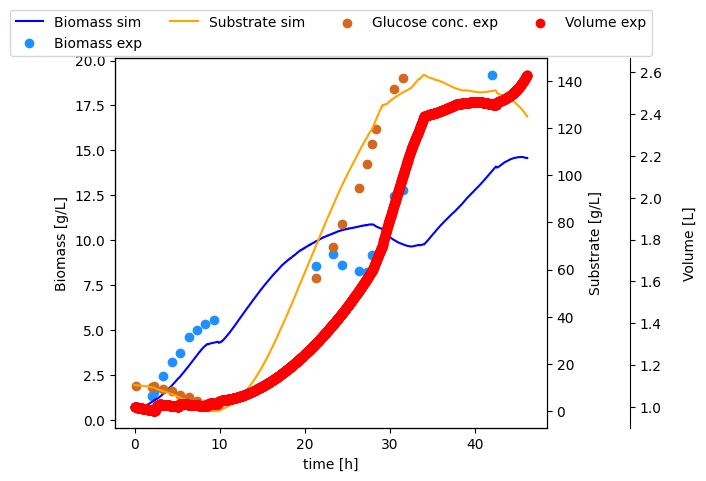

In [7]:
df_one = df_gen[df_gen['batch_id'] == '436']
show_plot(df_one)